## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

**Boston_dataset is a dictionary. let's check what it contains**


In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Load the data into pandas dataframe**

In [5]:
df = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [6]:
df['MDEV'] = boston_dataset['target']

**Data preprocessing**

Check for missing values in all the columns

In [7]:
# check for missing values in all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MDEV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Data Visualization**

In [8]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values


C:\Users\Daney\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


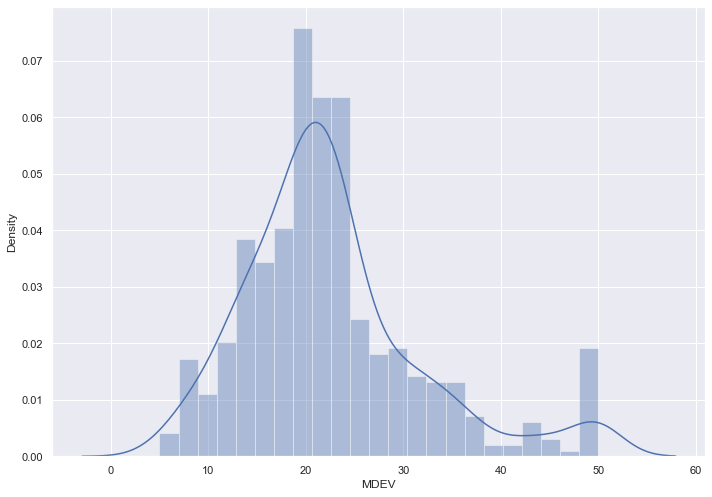

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(df['MDEV']);

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap


*   From coorelation plot: which are the columns that are more highli correlated with **MEDV**

* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity


In [10]:
# compute the pair wise correlation for all columns  
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


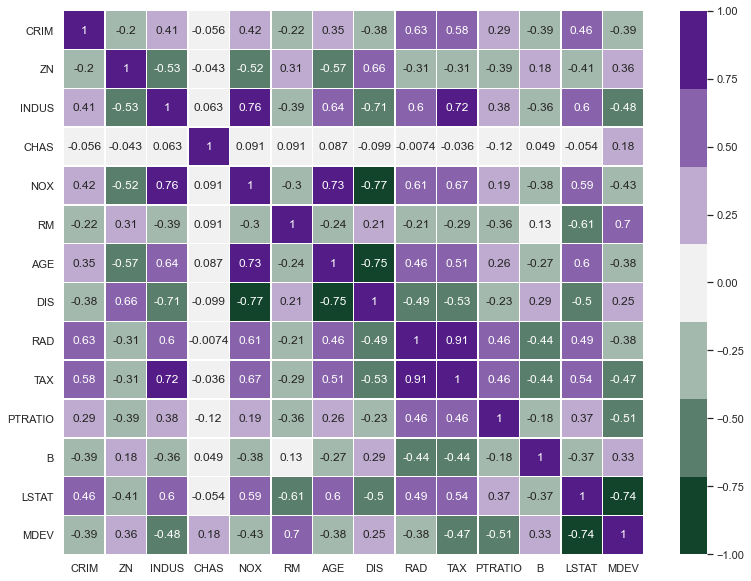

In [11]:
# use the heatmap function from seaborn to plot the correlation matrix
# Use: annot = True to print the values inside the square
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7));

In [12]:
'''
Las columnas mas correlacionadas son LSTAT, RM y PTRATIO

'''
df.corr()['MDEV'].apply(abs).sort_values(ascending=False)

MDEV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MDEV, dtype: float64

In [13]:
# Nos cargamos RAD ya que presenta una menor correlacion con el target
df.drop(columns=['RAD'], inplace=True)

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

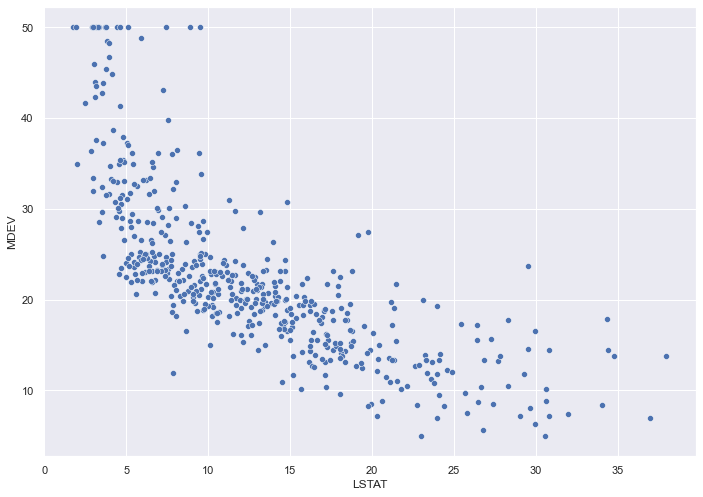

In [14]:
sns.scatterplot(x=df["LSTAT"] ,
                y=df["MDEV"]);

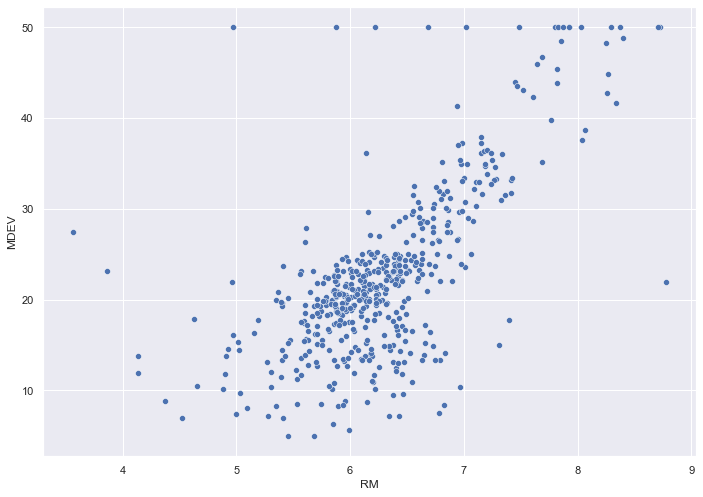

In [15]:
sns.scatterplot(x=df["RM"],
                y=df["MDEV"]);

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [16]:
X = df[['LSTAT', 'RM']]
Y = df['MDEV']

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [19]:
# model evaluation for training set
rmse = mean_squared_error(y_train, lin_reg.predict(X_train))
r2 = r2_score(y_train, lin_reg.predict(X_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = mean_squared_error(y_test, lin_reg.predict(X_test))
r2 = r2_score(y_test, lin_reg.predict(X_test))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 28.79027648205344
R2 score is 0.6618625964841894


The model performance for testing set
--------------------------------------
RMSE is 37.38310563877996
R2 score is 0.5409084827186417


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

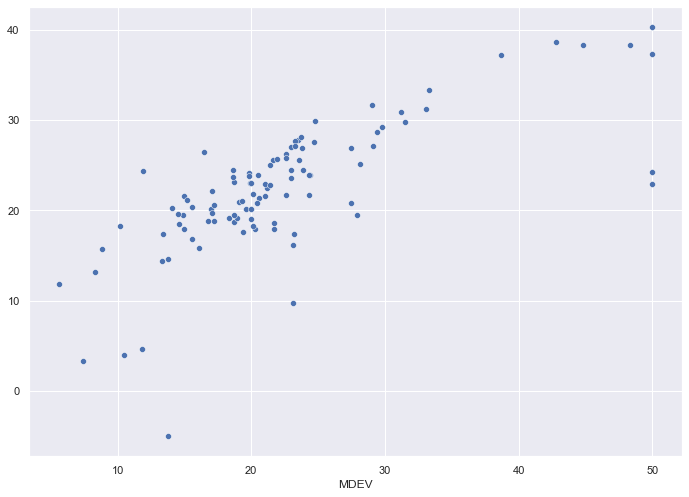

In [20]:
sns.scatterplot(x=y_test,
                y=lin_reg.predict(X_test));

C:\Users\Daney\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


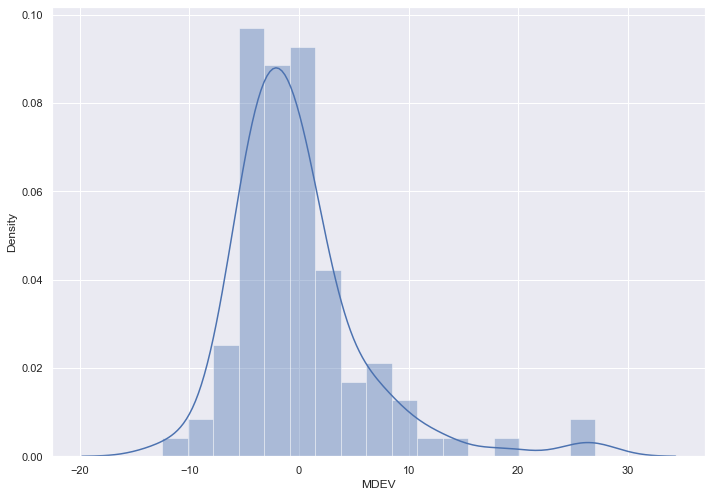

In [21]:
sns.distplot(y_test - lin_reg.predict(X_test));

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_poly = poly_reg.transform(X_train)

# Linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

rmse_train = mean_squared_error(y_train, pol_reg.predict(poly_reg.transform(X_train)))
r2_train = r2_score(y_train, pol_reg.predict(poly_reg.transform(X_train)))
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

rmse_test = mean_squared_error(y_test, pol_reg.predict(poly_reg.transform(X_test)))
r2_test = r2_score(y_test, pol_reg.predict(poly_reg.transform(X_test)))

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 18.65945383313938
R2 score of training set is 0.7808475624020519


The model performance for the test set
-------------------------------------------
RMSE of test set is 28.14497186312386
R2 score of test set is 0.6543594328054236


**Did the model improve using the plolynomila model?**

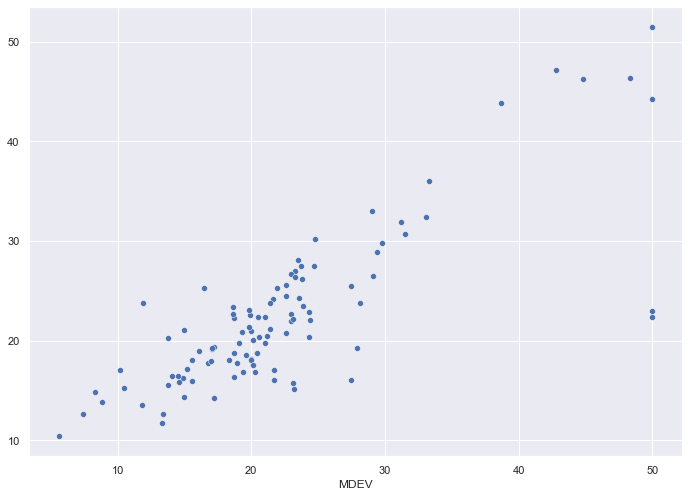

In [23]:
sns.scatterplot(x=y_test,
                y=pol_reg.predict(poly_reg.transform(X_test)));

In [24]:
y_train = np.log(y_train)

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, np.log(y_train))

# model evaluation for training set
rmse = mean_squared_error(y_train, np.exp(lin_reg.predict(X_train)))
r2 = r2_score(y_train, np.exp(lin_reg.predict(X_train)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = mean_squared_error(y_test, np.exp(lin_reg.predict(X_test)))
r2 = r2_score(y_test, np.exp(lin_reg.predict(X_test)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.04871135953002671
R2 score is 0.7147581515625538


The model performance for testing set
--------------------------------------
RMSE is 445.74240930233236
R2 score is -4.474038486277422
